Chian Yung 1103183219

# **Clustering with sklearn**

Clustering of unlabeled data can be performed with the module sklearn.cluster.

Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.


# **Overview of clustering Methods**
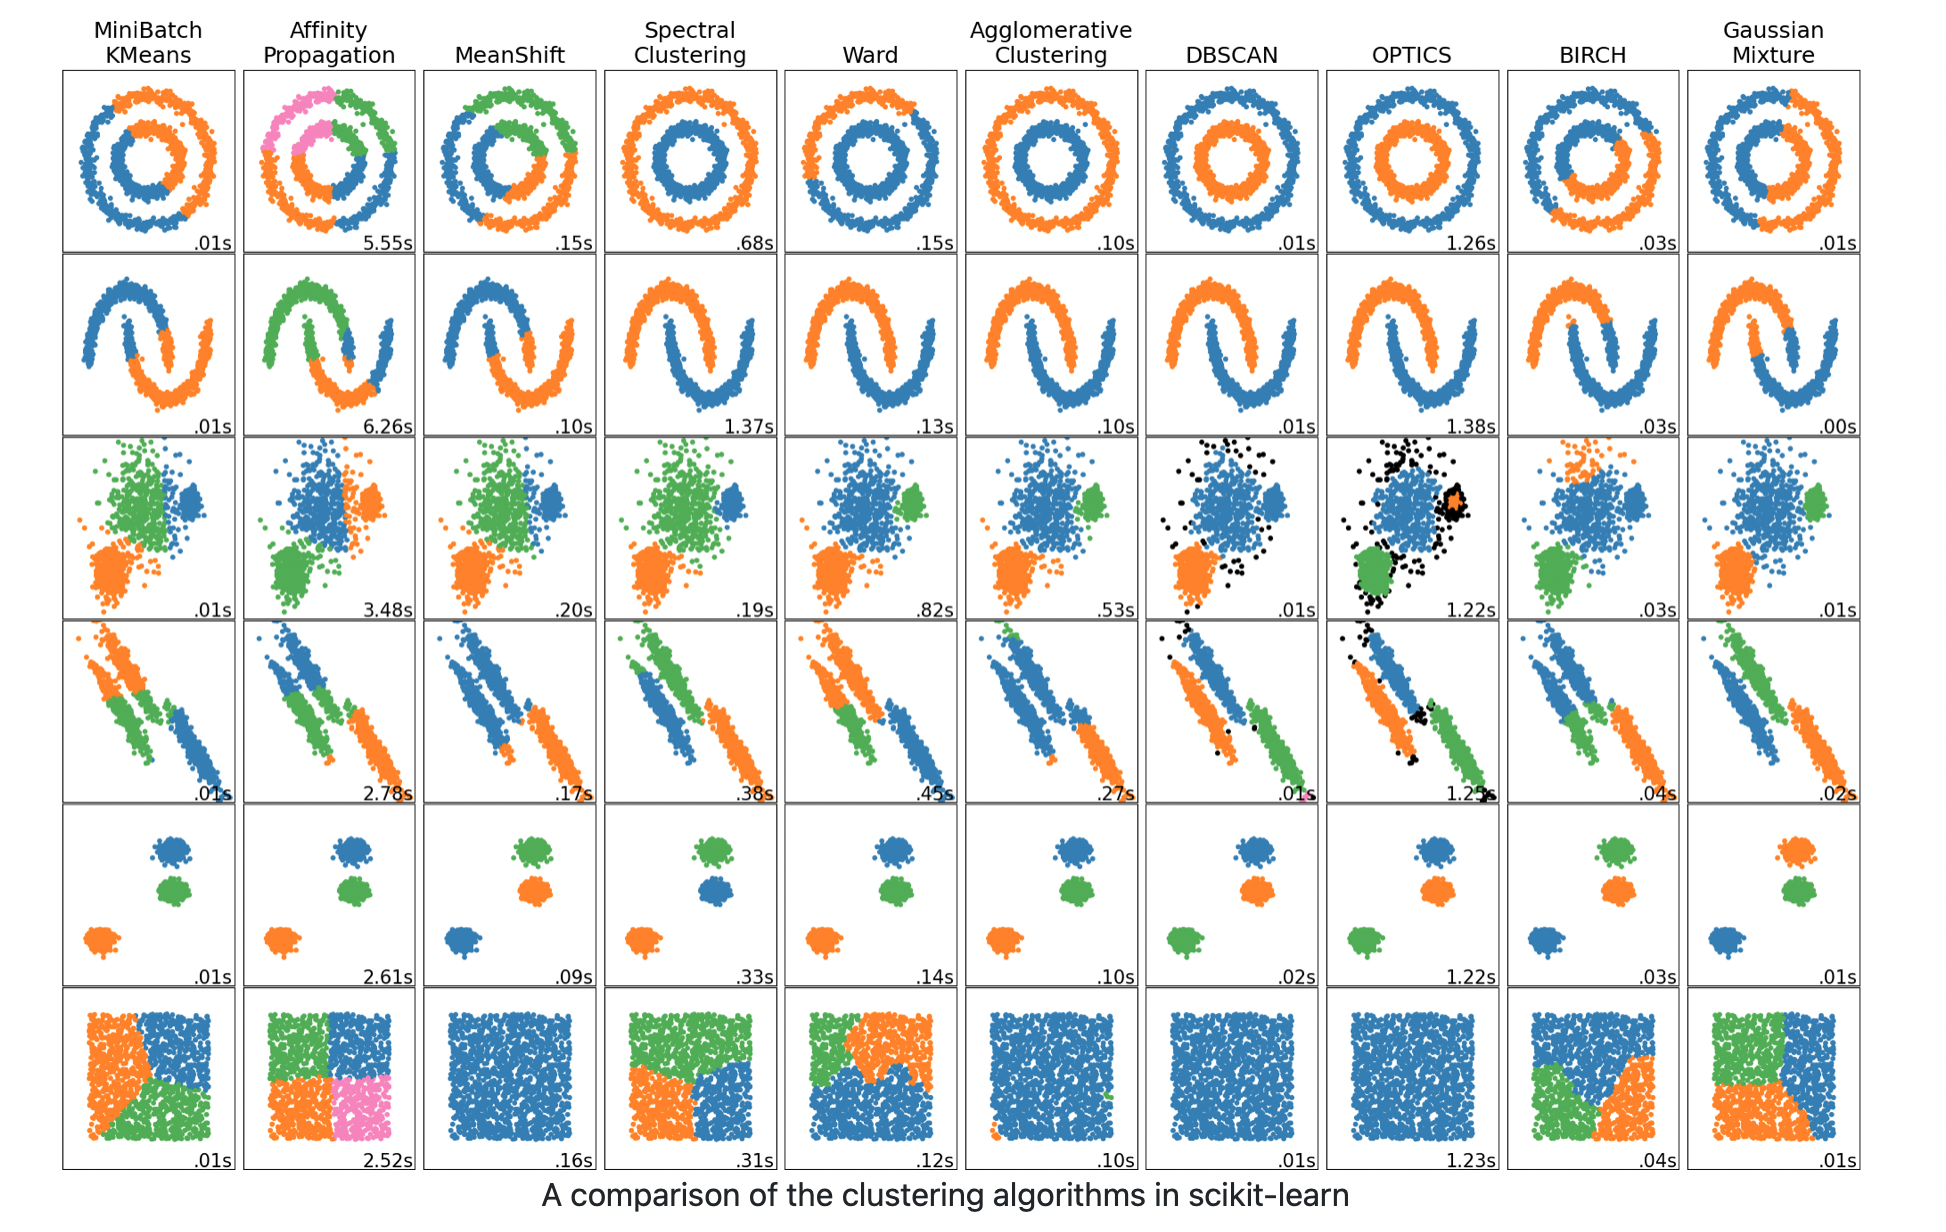


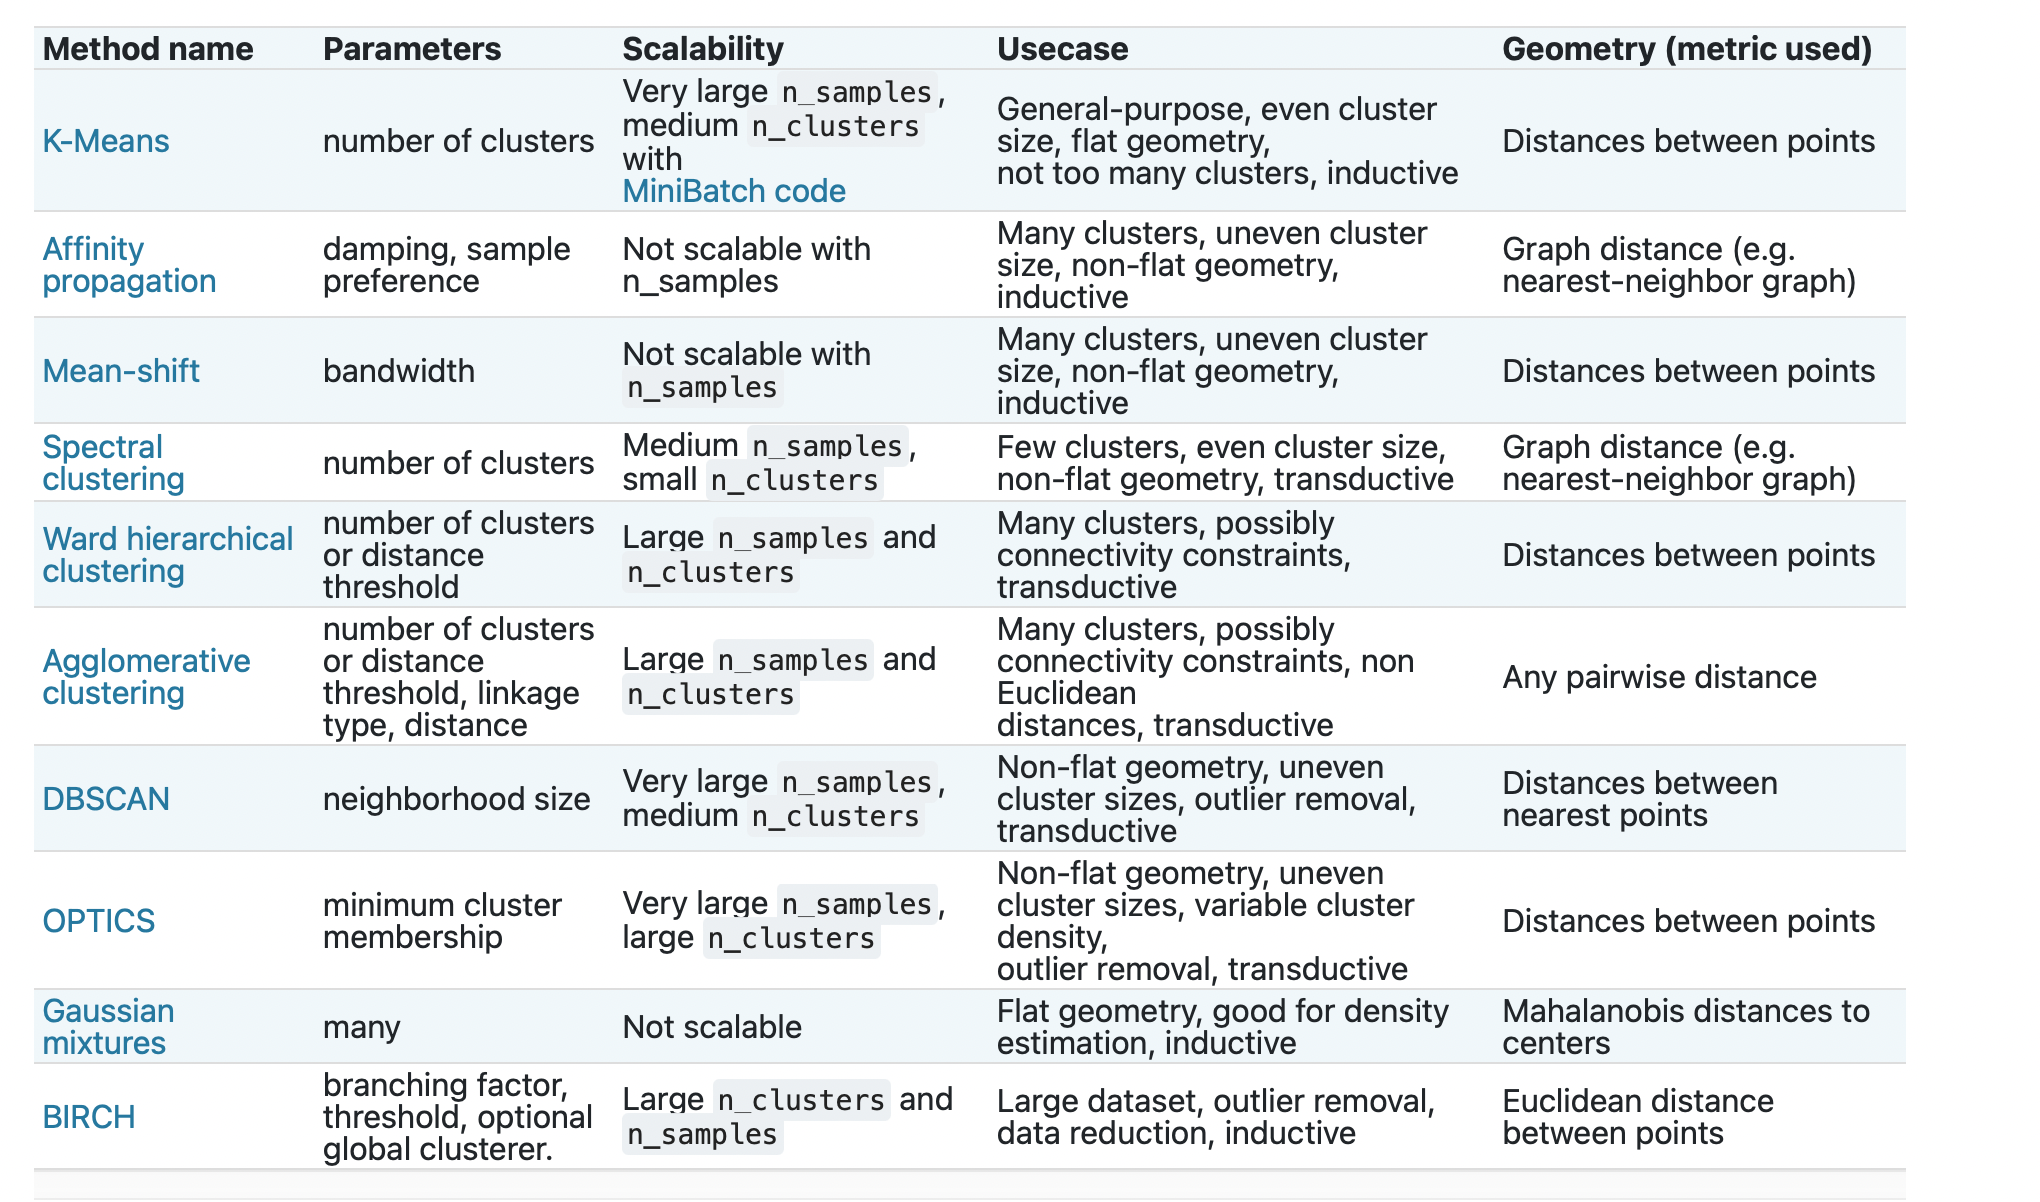

# **K-Means Clustering**

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

* The centroids of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

Use Cases:



*   Document Classification
*   Delivery Store Optimization
* Customer Segmentation
* Insurance Fraud Detection etc.

**Example Code K-Means Clustering**

In [ ]:
#import library-library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Menggunakan resource google drive untuk menyimpan dataset, kemudian menampilkannya
# Menampilkan 2 data untuk ditampilkan , dengan perintah raw_df.head(2)

raw_df = pd.read_csv('/content/drive/MyDrive/Dataset/CC GENERAL.csv.xls')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12

[2 rows x 17 columns]

In [ ]:
# Standarisasi Data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalisasi Data
normalized_df = normalize(scaled_df) 
  
# Konversi Numpy Array ke Pandas Dataframe
normalized_df = pd.DataFrame(normalized_df) 
  
# Mengurangi dimensi data
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544828

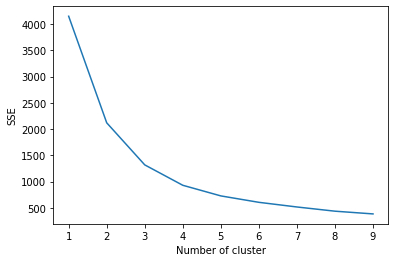

In [ ]:
# Memplot data untuk divisualisasikan

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

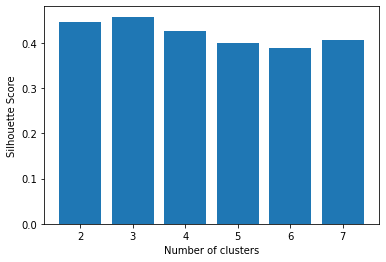

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

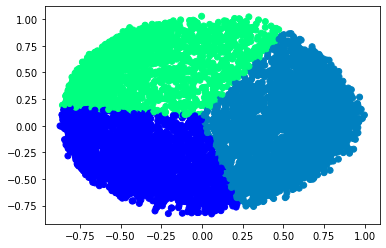

In [ ]:
# Visualisasi Klustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


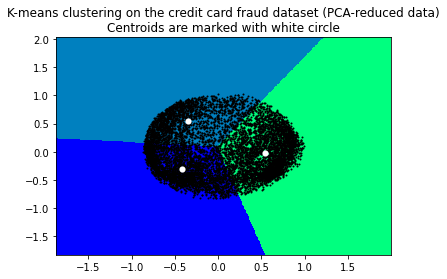

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# **Affinity Propagation**

AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from 
other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.

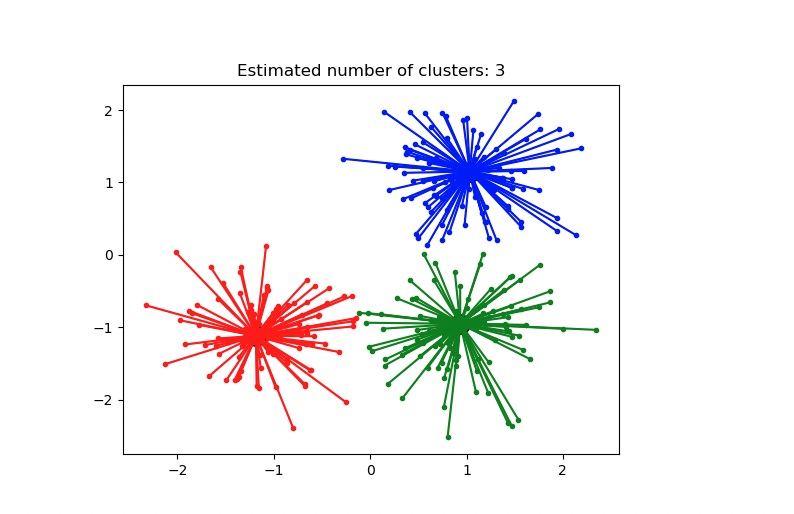

**Example Affinity Propagation**

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
  
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, -1]]
X, labels_true = make_blobs(n_samples = 400, centers = centers,
                           cluster_std = 0.5, random_state = 0)
  
# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
  
n_clusters_ = len(cluster_centers_indices)

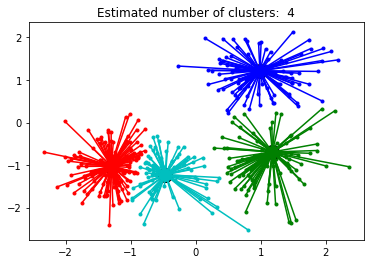

In [3]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()